>
# Project: Investigate TMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>
This dataset contains information about 10,000 movies collected from the Movie Database (TMDb), including popularity of genres, busget and revenue.
<br> 
- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
- There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
<br>

List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>

1. Which genres are most popular from year to year?
2. which features are associated with movies that have high revenues?

>
- The datset contains 10866 rows and 21 columns.
    - popularity- shows poularity of a movie genre
    - genres- indicates the various genres
    - ratings- shows rating for each movie genres
    - runtime- indicateshow long a movie takes  to watch
    - release_date- tiem of the year the movie was released
    - release_year- the year the movies was released
    - budget- shows initial budget
    - budget_adj- shows adjusted budget
    - revenue - shows revenue generated by a movie
    - revenue_adj- shows adjusted revenue generated
    - vote- count - indicated number of time a movie has been voted
    - vote_average - shows the average votes
    - id -shows id of various movies produced
    - cast - actors and actresses acting in the movies
    - Director - directing the movies
    - homepage where one can watch the movie
    - original title of the movie
    - tagline of the specific movie
    - overview - a glimpse into the movie
    - imdb_id- id in the imdb database

 

In [3]:
#importing package libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Assessing and cleaning the movie dataset to prepare it for eploratory data analysis.**


In [6]:
# Load your data and printing out a few lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
#make a copy of the dataset to work with
df_new = df.copy(deep = True)
df_new.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Assessing data
>
Exploring the dataset `tmdb-movies.csv` to answer some quizes such as:
    - number of samples in each dataset
    - number of columns in each dataset
    - duplicate rows in each dataset
    - datatypes of columns
    - features with missing values

In [5]:
#show a summary of the dataframe which entails the data types
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#number of rows and columns
df_new.shape

(10866, 21)

In [7]:
#summary statistics
df_new.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
#checking number of null values in each column
df_new.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
#checking number of duplicated values
df_new.duplicated().sum()

1

In [10]:
#showing different data types
df_new.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

## Data cleaning
>
**1. drop columns that won't be used for our analysis.**
     
**2. drop rows with missing values in the genre column** 
     
**3. Drop duplicate rows**



## Removal of columns that won't be used  <br>
<br>
Guided by the investigatory questions, we concluded that the following columns have no bearing on the target variables:'imdb_id','cast','homepage', 'director', 'tagline', 'keywords', 'overview','production_companies',.


In [11]:
#drop columns that won't be used.
df_new = df_new.drop(['imdb_id', 'cast','homepage', 'director', 'tagline', 'keywords', 'overview','production_companies',], axis=1)

In [12]:
df_new.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
#removing duplicates
df_new.drop_duplicates(inplace = True)

In [14]:
#Checking if the duplicates have been removed:
df_new.duplicated().sum()

0

In [15]:
df_new.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

## drop rows with missing values
From the study, it was seen that genres feature has 23 missing values. It was concluded that the affected rows be removed from the dataframe. The removed rows would have sparse effect (0.2% of total samples) on the analysis outcomes.

In [16]:
df_new.dropna(inplace=True)

In [17]:
#check if rows with missing values have been removed
df_new.isna().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [18]:
#summary of data after some cleaning
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10842 non-null  int64  
 1   popularity      10842 non-null  float64
 2   budget          10842 non-null  int64  
 3   revenue         10842 non-null  int64  
 4   original_title  10842 non-null  object 
 5   runtime         10842 non-null  int64  
 6   genres          10842 non-null  object 
 7   release_date    10842 non-null  object 
 8   vote_count      10842 non-null  int64  
 9   vote_average    10842 non-null  float64
 10  release_year    10842 non-null  int64  
 11  budget_adj      10842 non-null  float64
 12  revenue_adj     10842 non-null  float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.2+ MB


- Release_date has an incorrect data type, it is referred to as an object instead of datetime.

In [19]:
#correcting the incorrect datatype. 
#df['date_of_birth'] = pd.to_datetime(df['date_of_birth'],format='%d/%m/%Y')
df_new['release_date'] = pd.to_datetime(df_new['release_date'])

In [20]:
#checking if date has been changed to datetime
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10842 non-null  int64         
 1   popularity      10842 non-null  float64       
 2   budget          10842 non-null  int64         
 3   revenue         10842 non-null  int64         
 4   original_title  10842 non-null  object        
 5   runtime         10842 non-null  int64         
 6   genres          10842 non-null  object        
 7   release_date    10842 non-null  datetime64[ns]
 8   vote_count      10842 non-null  int64         
 9   vote_average    10842 non-null  float64       
 10  release_year    10842 non-null  int64         
 11  budget_adj      10842 non-null  float64       
 12  revenue_adj     10842 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 1.2+ MB


In [21]:
df_new.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [22]:
df_new.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,65870.675521,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,91981.355752,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.250000,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20557.000000,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75186.000000,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## removal of Zeros
From the above summary statistics, both budget and budget_adj have min of zeros, revenue and revenue_adj have min of zeros and runtime has min of zeros which will be removed.

In [23]:
#removing values less than zero and remaining with values greater than zero
movies = df_new.query('budget>0 and revenue>0 and runtime>0 and budget_adj>0 and revenue_adj>0')

- On removing zeros from the dataset, we created a new dataframe called movies.

In [24]:
movies.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [25]:
#new summarry statistics after removing invalid data
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1:  Which genres are most popular from year to year?

In [26]:
movies.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


### extracting columns from movies dataframe
 extracting relevant columns to use in exploring the most popular genre

In [27]:
#extract relevant columns
movies_genres = movies[['popularity','release_year', 'genres']]
movies_genres.head()

,popularity,release_year,genres
0,32.985763,2015,Action|Adventure|Science Fiction|Thriller
1,28.419936,2015,Action|Adventure|Science Fiction|Thriller
2,13.112507,2015,Adventure|Science Fiction|Thriller
3,11.173104,2015,Action|Adventure|Science Fiction|Fantasy
4,9.335014,2015,Action|Crime|Thriller


In [28]:
#split rows with more than one genre to get multiple rows
import warnings
warnings.filterwarnings('ignore')
movies_genres.genres = movies_genres.genres.str.split('|')

In [29]:
movies_genres.genres.head()

0    [Action, Adventure, Science Fiction, Thriller]
1    [Action, Adventure, Science Fiction, Thriller]
2            [Adventure, Science Fiction, Thriller]
3     [Action, Adventure, Science Fiction, Fantasy]
4                         [Action, Crime, Thriller]
Name: genres, dtype: object

- The above output shows the genres have been split

In [30]:
#exploding the genres data to have each movie genres on its own row
movies_genres = movies_genres.explode('genres')

In [31]:
movies_genres.shape
movies_genres.head()

,popularity,release_year,genres
0,32.985763,2015,Action
0,32.985763,2015,Adventure
0,32.985763,2015,Science Fiction
0,32.985763,2015,Thriller
1,28.419936,2015,Action


- The above table shows the genres have been explodeded and each genre is on its own.
- The exploded genres inherited the index of the original genre.

In [32]:
# groupby year and get the largest value
data = movies_genres.groupby(['release_year', 'genres'])['popularity'].mean().groupby(level='release_year').nlargest(1)

In [33]:
data.head()

release_year  release_year  genres   
1960          1960          Horror       2.610362
1961          1961          Animation    2.631987
1962          1962          Thriller     3.170651
1963          1963          Adventure    1.586280
1964          1964          Action       3.153791
Name: popularity, dtype: float64

In [34]:
# removing extra row index by reset index
data = data.reset_index(level=0, drop=True)

In [35]:
# changing the pandas series into a pandas dataframe
genres = data.reset_index()
genres.head()

,release_year,genres,popularity
0,1960,Horror,2.610362
1,1961,Animation,2.631987
2,1962,Thriller,3.170651
3,1963,Adventure,1.586280
4,1964,Action,3.153791


- the above shows that the index has been reset and the release year indexed as from 1960 to 2015

In [36]:
#summary statistics of different genres by popularity
genres.genres.value_counts()

Animation          15
Fantasy             9
Adventure           6
Science Fiction     4
Action              3
Family              3
Crime               3
War                 3
Horror              2
Thriller            2
Drama               2
Western             2
Mystery             1
Music               1
Name: genres, dtype: int64

- From the above summary statistics, Animation is leading in terms of popularity,followed by Fantasy, then adventure and then science fiction, after which popularity declines for other genres

- for ease of understanding the distribution of different genres, we shall use a pie chart for visualization.

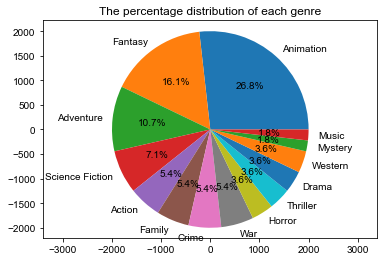

In [37]:
#a pie chart to show distribution of genres
sizes = genres.genres.value_counts().values
labels = genres.genres.value_counts().index

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', radius=2000, frame=True)
ax1.axis('equal')
plt.style.use("seaborn")
plt.title('The percentage distribution of each genre')
plt.show()

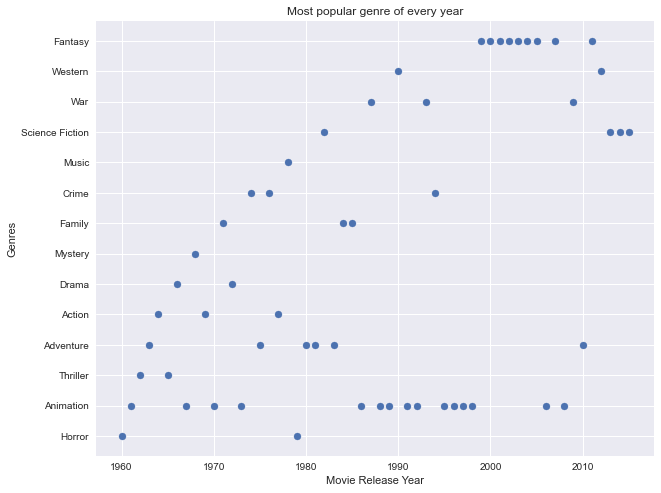

In [38]:
plt.figure(figsize=(10, 8))
plt.scatter(x=genres.release_year, y=genres.genres)
plt.title("Most popular genre of every year")
plt.xlabel("Movie Release Year")
plt.ylabel("Genres")
plt.show();

- The Scatter plot is consistent with summary statistics and shows that in the late 1980s and 1990s, the most popular genre was animation and in the late 1990s and 2000s, Fantasy took over the popularity.

### Research Question 2  Which features are associated with movies that have high revenues?!

In [39]:
#shape of cleaned dataset
movies.shape

(3854, 13)

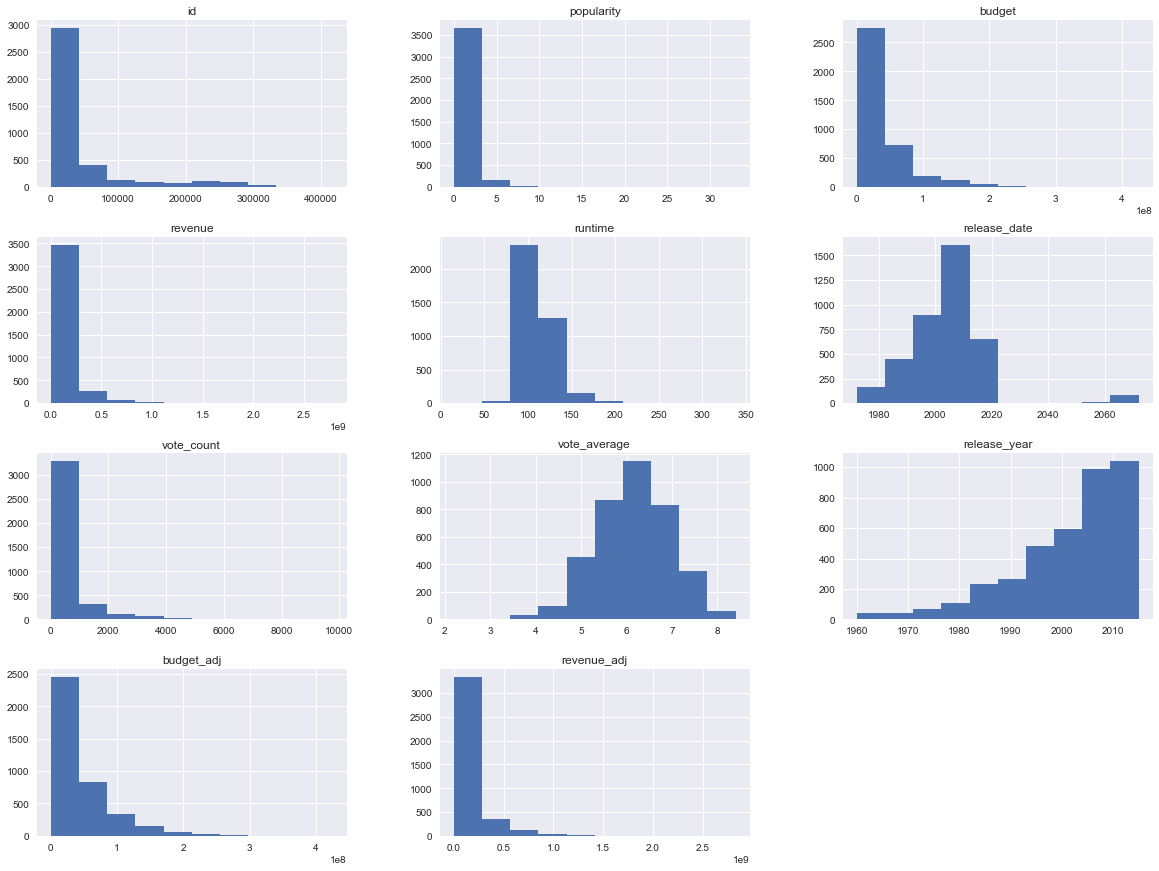

In [40]:
#plotting the different features in the dataset
movies.hist(figsize=(20, 15));

- The above visualization shows budget_adj and revenue_adj skewed to the right. They represent positive skewness.

In [41]:
#correlation on features that affect revenue_adj
movies.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.188878,-0.027449,-0.003206,-0.035688,0.111470,-0.001269,0.489926,-0.124035,-0.088287
popularity,0.188878,1.000000,0.446987,0.615535,0.215092,0.780096,0.317866,0.173278,0.399356,0.546959
budget,-0.027449,0.446987,1.000000,0.688556,0.260977,0.556937,0.024169,0.268040,0.958520,0.533498
revenue,-0.003206,0.615535,0.688556,1.000000,0.250298,0.754567,0.227123,0.139140,0.657567,0.900882
runtime,-0.035688,0.215092,0.260977,0.250298,1.000000,0.273771,0.351712,-0.112453,0.333976,0.280505
vote_count,0.111470,0.780096,0.556937,0.754567,0.273771,1.000000,0.387210,0.207191,0.497970,0.654688
vote_average,-0.001269,0.317866,0.024169,0.227123,0.351712,0.387210,1.000000,-0.134246,0.036803,0.266844
release_year,0.489926,0.173278,0.268040,0.139140,-0.112453,0.207191,-0.134246,1.000000,0.075103,-0.103147
budget_adj,-0.124035,0.399356,0.958520,0.657567,0.333976,0.497970,0.036803,0.075103,1.000000,0.570451
revenue_adj,-0.088287,0.546959,0.533498,0.900882,0.280505,0.654688,0.266844,-0.103147,0.570451,1.000000


- The table above represents a relationship among feautures in table format

- we shall plot a heatmap and scatter plots to show the relationship among features associated with high revenue. We shall use revenue_adj to compare the relationship.

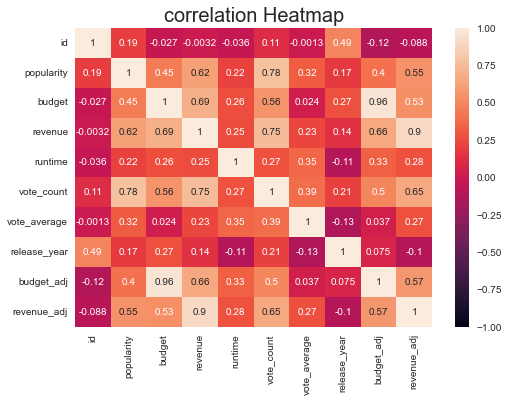

<Figure size 2160x2160 with 0 Axes>

In [42]:
#use of a correlation heatmap to identify relationships on feautures affecting revenue_adj
heatmap=sns.heatmap(movies.corr(),vmin=-1,vmax=1,annot=True)
heatmap.set_title('correlation Heatmap',fontdict={'fontsize':20})
plt.figure(figsize = (30,30))
plt.show()

- From the above heatmap, the revenue_adj has a strong correlation of 0.55 with popularity
- Revenue-adj has a strong correlation of 0.65 with vote_count
- revenue_adj has a strong correlation of 0.57 with budget_adj

In [43]:
movies.revenue_adj.describe()

count    3.854000e+03
mean     1.370647e+08
std      2.161114e+08
min      2.370705e+00
25%      1.835735e+07
50%      6.173068e+07
75%      1.632577e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

- Revenue will be considered high_revenue if it's above 75 percentile.
- Revenue_adj will be considered in this case.

In [44]:
high_revenue = movies.revenue_adj.quantile(.75)
print(high_revenue)
high_revenue_movies = movies[movies.revenue_adj > high_revenue]
high_revenue_movies.head()

163257654.55583102


,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


- The above table shows values of revenue_adj which are above 75 precentile

- Below is a function that takes in four parameters to plot correlation between the dependent variables and independents variables
- I have used seaborn to plot the correlation between different features that affect revenue_adj

In [45]:
def relationship(dframe,x,y,title):
    plt.figure(figsize=(10, 8))
    sns.regplot(data = dframe, x=x, y=y)
    plt.title(title,fontsize=12)
    plt.xlabel(x)
    plt.ylabel(y)

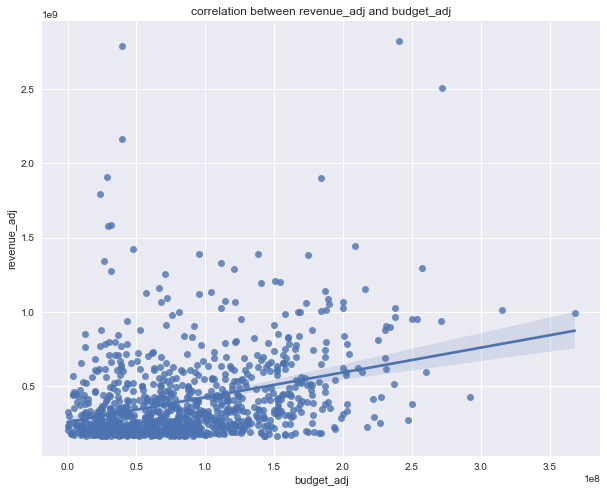

In [46]:
relationship(high_revenue_movies,'budget_adj', 'revenue_adj', 'correlation between revenue_adj and budget_adj')

- revenue_adj and budget_adj both have positive correlation(0.57) between them. 
- which is an indication that there is a good chance that movies with higher investiment result in higher revenue. 

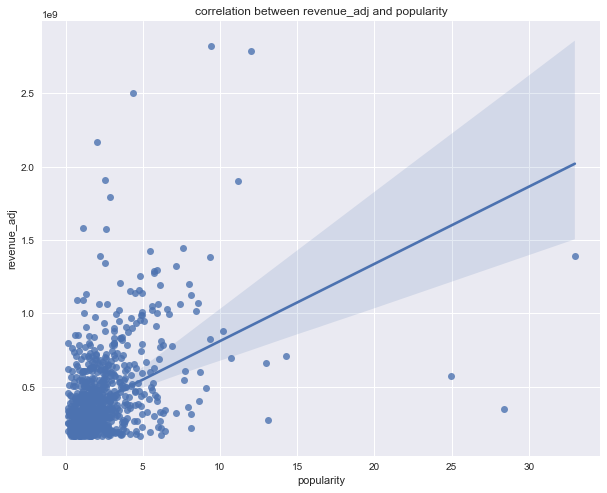

In [47]:
relationship(high_revenue_movies,'popularity', 'revenue_adj', 'correlation between revenue_adj and popularity')

- revenue_adj and popularity both have positive correlation(0.55) between them. 
- which is an indication that there is a good chance that movies with greater popularity result in higher revenue. 

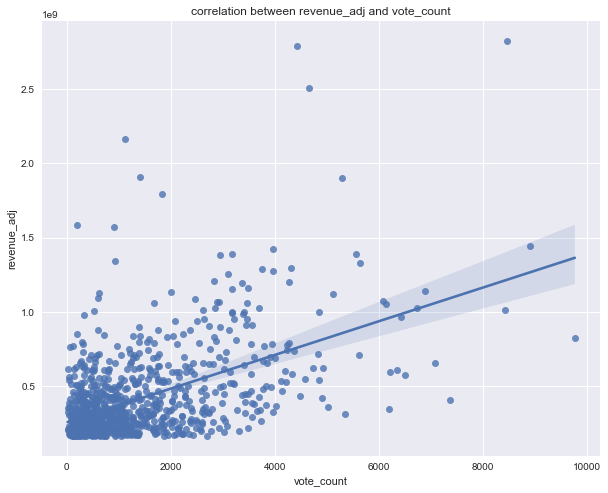

In [48]:
relationship(high_revenue_movies,'vote_count', 'revenue_adj', 'correlation between revenue_adj and vote_count')

- revenue_adj and vote_count both have positive correlation(0.65) between them. 
- which is an indication that there is a good chance that movies with higher votes result in higher revenue. 

<a id='conclusions'></a>
## Conclusions

> 
- For the analysis conducted, we found the the most popular movies from year to year to be Animations from late 1980s to 1990s, followed by Fantasy from late 1990s to 2000s and then adventurer from 1970s and early 1980s.
- The analysis show that movie genres with higher vote count results into higher revenue. so highly voted movies brought high returns. The popularity affected revenue generated from a movies and the most popular resulted to higher revenues. The budget also affected the returns. The bigger the budget the higher the revenues.
- Further research can be done to determine the 10 most popular movies and actors who produced most movies. 


> Limitation:
- The dataset contains null and zero values in some features which hinder accurate analysis of the dataset since they have to be removed. I had to drop the cast, actors, etc because they had a large number of null values. I had to Drop some rows in genres because it had null values. Zero values in the budget_adj was unrealistic  since budget can't be zero and could create false results in return. 


>References
1. https://www.kaggle.com/code/deepak525/investigate-tmdb-movie-dataset/notebook
2. https://queirozf.com/entries/pandas-dataframe-examples-manipulating-date-and-time
3. https://www.w3resource.com/pandas/dataframe/dataframe-explode.php
4. https://sparkbyexamples.com/pandas/pandas-create-new-dataframe-by-selecting-specific-columns